In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
fd=pd.read_csv(r"C:\Users\DELL\Downloads\Fraud.csv",encoding="latin1")

In [3]:
fd.shape

(6362620, 11)

In [5]:
fd.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6286324,660,TRANSFER,51725.86,C141049972,51725.86,0.00,C823707248,0.00,0.00,1,0
4527315,326,PAYMENT,6682.99,C580852574,51548.00,44865.01,M2037757880,0.00,0.00,0,0
6308618,686,PAYMENT,14120.28,C1667141850,266807.56,252687.28,M1337477202,0.00,0.00,0,0
1057427,96,CASH_IN,56939.48,C822866920,14758.00,71697.48,C1803736914,0.00,0.00,0,0
1787661,162,PAYMENT,3486.37,C1011540826,0.00,0.00,M1936879813,0.00,0.00,0,0
4963835,351,PAYMENT,10408.51,C1882153612,47741.00,37332.49,M137881797,0.00,0.00,0,0
3881152,283,CASH_OUT,29608.18,C1376787118,944673.00,915064.82,C1059635183,15348.05,44956.23,0,0
1292406,135,CASH_OUT,130929.31,C42668937,51555.00,0.00,C1948524909,0.00,130929.31,0,0
3852398,283,PAYMENT,10116.13,C763851647,0.00,0.00,M1911919797,0.00,0.00,0,0
2315430,188,CASH_OUT,155045.58,C1628777944,0.00,0.00,C976352450,3161309.71,3180687.04,0,0


In [6]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#### Amount is getting transffered from A to B

In [7]:
fd.rename(columns={"oldbalanceOrg":"A_old_bal","newbalanceOrig":"A_new_bal","newbalanceDest":"B_new_bal","oldbalanceDest":"B_old_bal","isFraud":"Fraud"},inplace=True)

In [8]:
fd.rename(columns={"nameOrig":"A","nameDest":"B"},inplace=True)

In [9]:
fd.sample()

,step,type,amount,A,A_old_bal,A_new_bal,B,B_old_bal,B_new_bal,Fraud,isFlaggedFraud
4443844,323,PAYMENT,4494.05,C668269211,186533.59,182039.54,M752560789,0.0,0.0,0,0


In [10]:
fd.isnull().sum()

step              0
type              0
amount            0
A                 0
A_old_bal         0
A_new_bal         0
B                 0
B_old_bal         0
B_new_bal         0
Fraud             0
isFlaggedFraud    0
dtype: int64

In [11]:
fd.duplicated().sum()

0

In [12]:
fd["isFlaggedFraud"].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

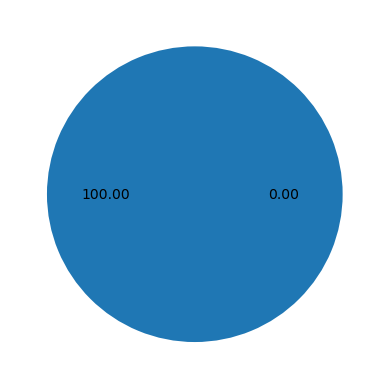

In [13]:
plt.pie(fd["isFlaggedFraud"].value_counts(),autopct="%.2f") 
plt.show()

In [14]:
fd["Fraud"].value_counts()

0    6354407
1       8213
Name: Fraud, dtype: int64

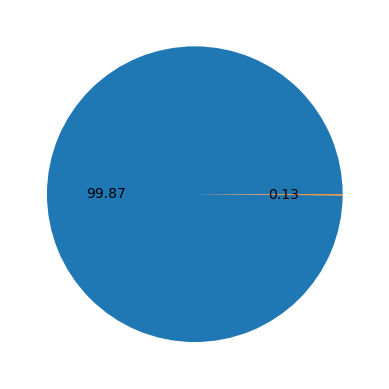

In [15]:
plt.pie(fd["Fraud"].value_counts(),autopct="%.2f") 
plt.show()

In [16]:
fd['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

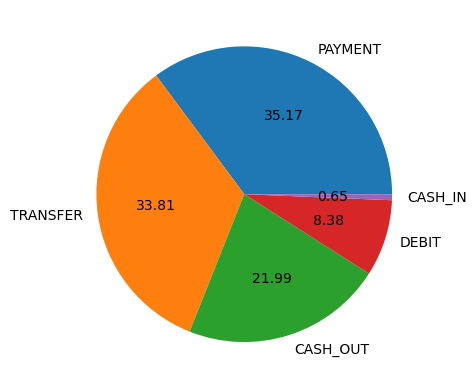

In [17]:
plt.pie(fd["type"].value_counts(),autopct="%.2f",labels=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']) 
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
d=LabelEncoder()

In [19]:
fd["Type"]=d.fit_transform(fd["type"])

In [20]:
fd.head()

,step,type,amount,A,A_old_bal,A_new_bal,B,B_old_bal,B_new_bal,Fraud,isFlaggedFraud,Type
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,3
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,3
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,3


In [21]:
fd.columns

Index(['step', 'type', 'amount', 'A', 'A_old_bal', 'A_new_bal', 'B',
       'B_old_bal', 'B_new_bal', 'Fraud', 'isFlaggedFraud', 'Type'],
      dtype='object')

#### Removing outliers

In [22]:
def remove_outliers_iqr(df, exclude_columns):
    # Initialize a DataFrame to store the filtered data
    df_clean = df.copy()
    
    # Iterate through each column in the DataFrame
    for column in df.columns:
        if column not in exclude_columns and pd.api.types.is_numeric_dtype(df[column]):
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Filter out the outliers
            df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    return df_clean

In [23]:
exclude_columns = fd[['Fraud', 'isFlaggedFraud']]
cfd= remove_outliers_iqr(fd, exclude_columns)

In [26]:
print("Original data shape:", fd.shape)
print("Cleaned data shape:", cfd.shape)

Original data shape: (6362620, 12)
Cleaned data shape: (4321893, 12)


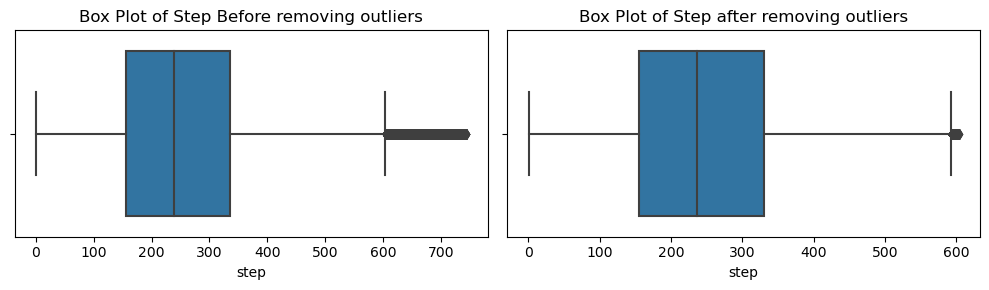

In [27]:
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.boxplot(x=fd['step'])
plt.title('Box Plot of Step Before removing outliers')
plt.subplot(1, 2, 2)
sns.boxplot(x=cfd['step'])
plt.title('Box Plot of Step after removing outliers')
plt.tight_layout()
plt.show()

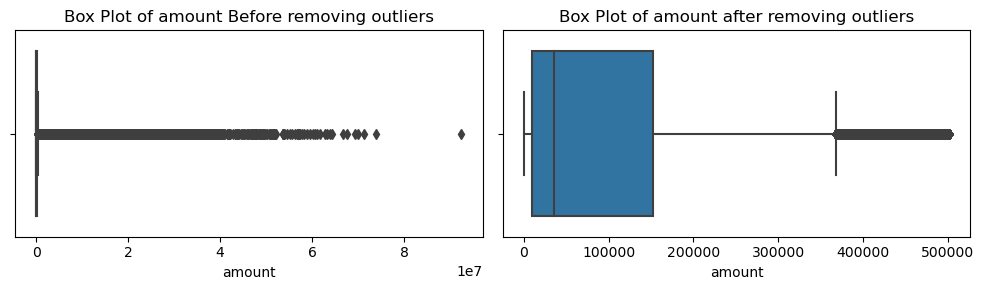

In [28]:
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.boxplot(x=fd['amount'])
plt.title('Box Plot of amount Before removing outliers')
plt.subplot(1, 2, 2)
sns.boxplot(x=cfd['amount'])
plt.title('Box Plot of amount after removing outliers')
plt.tight_layout()
plt.show()

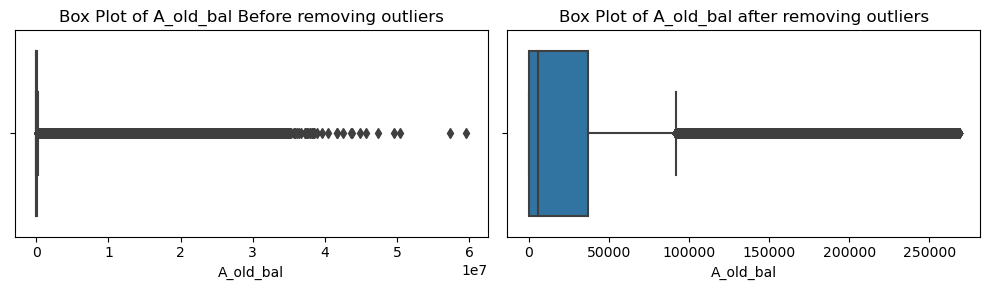

In [29]:
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.boxplot(x=fd['A_old_bal'])
plt.title('Box Plot of A_old_bal Before removing outliers')
plt.subplot(1, 2, 2)
sns.boxplot(x=cfd['A_old_bal'])
plt.title('Box Plot of A_old_bal after removing outliers')
plt.tight_layout()
plt.show()

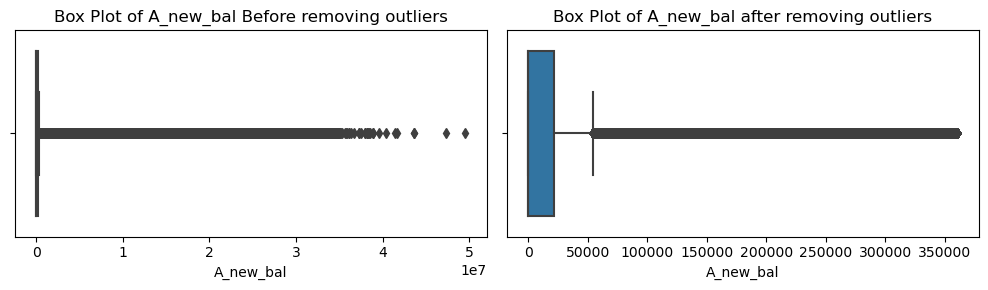

In [30]:
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.boxplot(x=fd['A_new_bal'])
plt.title('Box Plot of A_new_bal Before removing outliers')
plt.subplot(1, 2, 2)
sns.boxplot(x=cfd['A_new_bal'])
plt.title('Box Plot of A_new_bal after removing outliers')
plt.tight_layout()
plt.show()

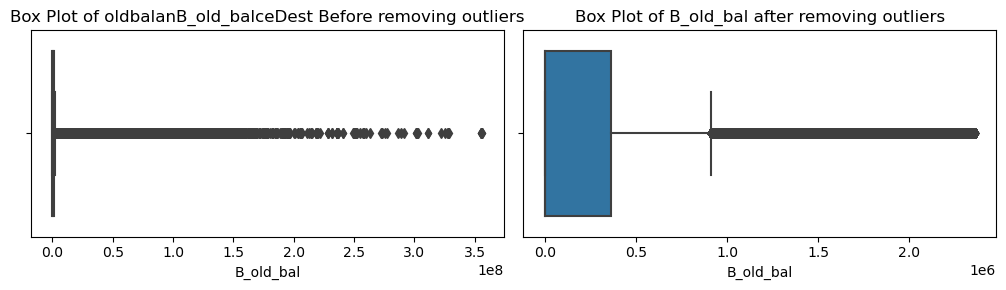

In [31]:
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.boxplot(x=fd['B_old_bal'])
plt.title('Box Plot of oldbalanB_old_balceDest Before removing outliers')
plt.subplot(1, 2, 2)
sns.boxplot(x=cfd['B_old_bal'])
plt.title('Box Plot of B_old_bal after removing outliers')
plt.tight_layout()
plt.show()

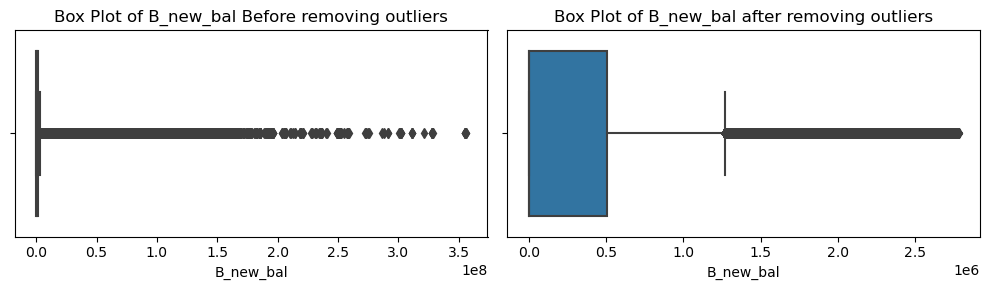

In [32]:
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.boxplot(x=fd['B_new_bal'])
plt.title('Box Plot of B_new_bal Before removing outliers')
plt.subplot(1, 2, 2)
sns.boxplot(x=cfd['B_new_bal'])
plt.title('Box Plot of B_new_bal after removing outliers')
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5776\1708637983.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=cfd.corr(),annot=True)


<Axes: >

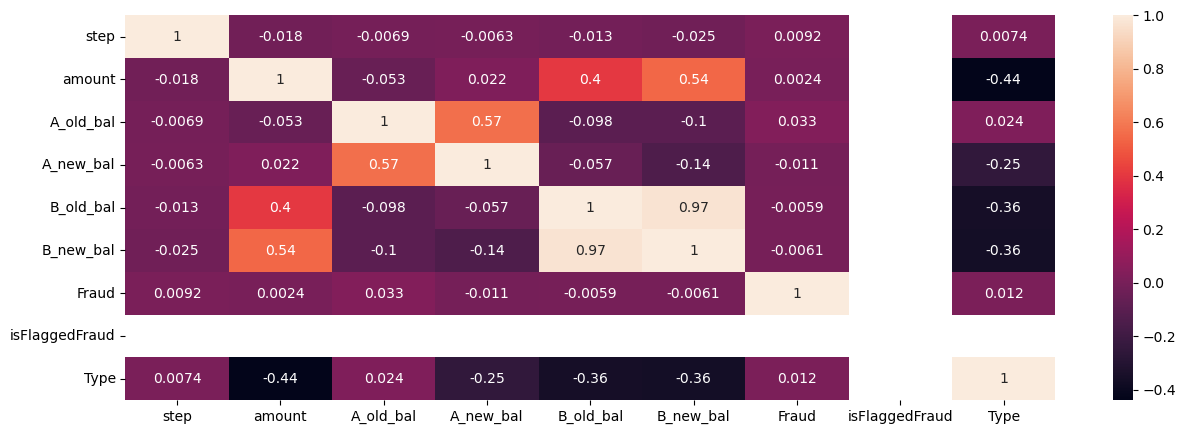

In [33]:
plt.figure(figsize=(15,5))
sns.heatmap(data=cfd.corr(),annot=True)

#### By correlation we found out the features that are important for our classification model the type, old balance of A, new balance B,amount are the important features.  

## Model Building

In [34]:
x=cfd[["A_old_bal","A_new_bal","Type","amount"]]

In [42]:
y=cfd.iloc[:,-3]

In [43]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6259911    0
6259916    1
6259924    1
6259930    1
6259931    1
Name: Fraud, Length: 4321893, dtype: int64

In [44]:
x.shape,y.shape

((4321893, 4), (4321893,))

### Balancing the data 
As we know the data was imbalanced

In [45]:
from imblearn.under_sampling import NearMiss

In [46]:
nm=NearMiss()

In [47]:
nm.random_state=42

In [48]:
x_res,y_res=nm.fit_resample(x,y)

In [49]:
x_res.shape,y_res.shape

((4974, 4), (4974,))

### Model Selection 

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [56]:
knn=KNeighborsClassifier()
lr=LogisticRegression()
rfc=RandomForestClassifier()
gnb=GaussianNB()
mnb= MultinomialNB()
bnb=BernoulliNB()
dt=DecisionTreeClassifier()

In [57]:
models=[knn,lr,rfc,dt,mnb,gnb,bnb]

In [60]:
def compare_models_train_test(list):
    for k in list:
        k.fit(X_train,Y_train)
        y_pred= k.predict(X_test)
        ac=accuracy_score(Y_test,y_pred)
        cm=confusion_matrix(Y_test,y_pred)
        pc= precision_score(Y_test, y_pred)
        print("Score of {} :\nac={}\ncm={}\npc={}".format(k,ac,cm,pc))  

In [61]:
compare_models_train_test(models)

Score of KNeighborsClassifier() :
ac=0.9487437185929648
cm=[[487  25]
 [ 26 457]]
pc=0.9481327800829875
Score of LogisticRegression() :
ac=0.9527638190954774
cm=[[500  12]
 [ 35 448]]
pc=0.9739130434782609
Score of RandomForestClassifier() :
ac=0.9919597989949749
cm=[[506   6]
 [  2 481]]
pc=0.9876796714579056
Score of DecisionTreeClassifier() :
ac=0.9889447236180905
cm=[[505   7]
 [  4 479]]
pc=0.98559670781893
Score of MultinomialNB() :
ac=0.9567839195979899
cm=[[483  29]
 [ 14 469]]
pc=0.9417670682730924
Score of GaussianNB() :
ac=0.9376884422110553
cm=[[500  12]
 [ 50 433]]
pc=0.9730337078651685
Score of BernoulliNB() :
ac=0.9195979899497487
cm=[[436  76]
 [  4 479]]
pc=0.863063063063063


### Thus we will use Random Forest Classifier

### Selection of best Hyperparameters using randomized Search CV

In [73]:
parameters={'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9]}

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
classifier=RandomizedSearchCV(rfc, parameters,cv=5)

In [76]:
classifier.fit(x_res,y_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 6, 9],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [3, 6, 9],
                                        'n_estimators': [25, 50, 100, 150]})

In [77]:
result= pd.DataFrame(classifier.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_leaf_nodes,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.698944,0.204132,0.009375,7.655006e-03,50,3,None,3,"{'n_estimators': 50, 'max_leaf_nodes': 3, 'max...",0.961809,0.974874,0.951759,0.948744,0.924547,0.952347,0.016632,8
1,0.303458,0.149749,0.015977,1.700903e-02,25,3,log2,6,"{'n_estimators': 25, 'max_leaf_nodes': 3, 'max...",0.950754,0.975879,0.947739,0.948744,0.924547,0.949533,0.016271,10
2,0.169571,0.085012,0.012505,6.252468e-03,25,9,sqrt,3,"{'n_estimators': 25, 'max_leaf_nodes': 9, 'max...",0.951759,0.981910,0.958794,0.950754,0.931590,0.954961,0.016218,6
3,0.408682,0.020843,0.015622,7.747687e-07,50,6,None,6,"{'n_estimators': 50, 'max_leaf_nodes': 6, 'max...",0.989950,0.985930,0.972864,0.987940,0.970825,0.981502,0.008013,3
4,0.131220,0.007654,0.006248,7.652378e-03,25,9,sqrt,9,"{'n_estimators': 25, 'max_leaf_nodes': 9, 'max...",0.990955,0.992965,0.983920,0.989950,0.977867,0.987131,0.005527,1
5,0.860406,1.058544,0.044898,6.737320e-02,50,3,sqrt,6,"{'n_estimators': 50, 'max_leaf_nodes': 3, 'max...",0.956784,0.976884,0.949749,0.946734,0.923541,0.950738,0.017186,9
6,6.833428,1.658851,0.570777,4.276782e-01,100,3,None,9,"{'n_estimators': 100, 'max_leaf_nodes': 3, 'ma...",0.961809,0.975879,0.951759,0.948744,0.924547,0.952548,0.016907,7
7,2.013563,1.931626,0.060134,3.523641e-02,100,6,log2,6,"{'n_estimators': 100, 'max_leaf_nodes': 6, 'ma...",0.985930,0.989950,0.972864,0.977889,0.937626,0.972852,0.018599,4
8,0.915329,0.463950,0.029436,1.051744e-02,100,9,sqrt,9,"{'n_estimators': 100, 'max_leaf_nodes': 9, 'ma...",0.990955,0.992965,0.985930,0.980905,0.977867,0.985724,0.005741,2
9,0.926014,0.250064,0.063474,3.735884e-02,150,9,sqrt,3,"{'n_estimators': 150, 'max_leaf_nodes': 9, 'ma...",0.964824,0.981910,0.963819,0.951759,0.932596,0.958981,0.016319,5


In [78]:
best_paras=classifier.best_params_
print(best_paras)

{'n_estimators': 25, 'max_leaf_nodes': 9, 'max_features': 'sqrt', 'max_depth': 9}


In [79]:
highest_accuracy=classifier.best_score_
highest_accuracy

0.9871312295885868

In [82]:
resultrscv=result[['param_n_estimators', 
    'param_max_features', 
    'param_max_depth', 
    'param_max_leaf_nodes',"mean_test_score"]]

In [70]:
resultrscv

,param_min_samples_split,param_max_depth,param_min_samples_leaf,mean_test_score
0,2,20,1,0.982911
1,2,30,1,0.982911
2,2,10,4,0.987736
3,10,10,2,0.988138
4,10,20,2,0.986731
5,2,10,1,0.984720
6,5,30,1,0.983715
7,2,20,2,0.983111
8,5,30,2,0.984720
9,5,20,4,0.987133


In [86]:
rfc1=RandomForestClassifier(n_estimators=25, max_leaf_nodes=9, max_features= "sqrt", max_depth=9)

In [89]:
rfc1.fit(X_train,Y_train)
y1_pred= rfc1.predict(X_test)
ac1=accuracy_score(Y_test,y1_pred)
cm1=confusion_matrix(Y_test,y1_pred)
pc1= precision_score(Y_test, y1_pred)
print("ac={}\ncm={}\npc={}".format(ac1,cm1,pc1))  

ac=0.992964824120603
cm=[[507   5]
 [  2 481]]
pc=0.9897119341563786


### Accuracy and precision before randomized search:
Score of RandomForestClassifier() :
ac=0.9919597989949749
pc=0.9876796714579056
###  Accuracy and precision after randomized search:
Score of RandomForestClassifier():
ac=0.992964824120603
pc=0.9897119341563786